# Lab 05. Regression and Clustering


In this lab we will tackle two types of tasks: 
- Regression Competition
- Clustering practice


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab05_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab05_404_Sheipak_Sviat.ipynb`
    - `2022_lab05_M106_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab05_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-12-08 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/gqo8GmBMUBfRuw

## Part 1. Regression [7 points]

The task is to predict a price of a house sold in California based on some description of a house. Some columns give some information on the house itself (number of bedrooms, short written summary and so on) and some describe the neighborhood (middleschoolscore, middleschooldistance).

* Id column - `id`
* Target column - `sold_price`
* Scoring is `RMSE` - root mean squared error

In [1472]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1473]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [1474]:
df_test.head(5)

,address,sold_price,summary,type,year_built,heating,cooling,parking,bedrooms,bathrooms,...,tax_assessed_value,annual_tax_amount,listed_on,listed_price,last_sold_on,last_sold_price,city,zip,state,id
0,141 Brophy St,13.091904,Beautiful 3 bd 2 bath home sits nestled in the...,SingleFamily,1969.0,Other,NaN,Garage - Attached,3,2.0,...,11.171941,841.0,2021-07-17,13.049793,NaN,NaN,American Canyon,94503,CA,47223
1,104 Sierra Linda,14.220976,"104 Sierra Linda, Los Gatos, CA 95032 is a tow...",Townhouse,1984.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",3,3.0,...,11.890896,2513.0,2020-11-02,14.148405,1995-10-20,12.936034,Los Gatos,95032,CA,3884
2,2866 Jackson St,14.962913,A rare offering in a prime Pacific Heights loc...,Condo,1923.0,Central,NaN,"Attached, Private, Side By Side, Side by Side,...",4,3.0,...,14.746101,31133.0,2021-03-29,15.037814,2011-08-05,14.603968,San Francisco,94115,CA,9337
3,701 E 120th St,13.058358,Recently remodeled 2bedroom 1 bath Tudor style...,SingleFamily,1932.0,Wall Furnace,None,"Driveway, Garage",2,1.0,...,11.765768,2003.0,2021-05-31,13.070860,2020-08-12,12.721886,Los Angeles,90059,CA,25318
4,11533 Horley Ave,13.451667,FIRST TIME ON THE MARKET IN 42 YEARS!! Welcome...,SingleFamily,1950.0,Central,Central Air,Garage,3,2.0,...,12.079148,2392.0,2021-07-20,13.398479,NaN,NaN,Downey,90241,CA,4636


In [1475]:
numeric_cols = ['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'total_spaces', 'garage_spaces', 
                'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'middle_school_distance', 
                'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 
                'last_sold_price', 'year_built', 'annual_tax_amount']

cat_cols = ['type', 'heating', 'cooling', 'parking', 'bedrooms', 'region',
            'flooring', 
            'heating_features', 'cooling_features', 'appliances_included', 
            'laundry_features', 'parking_features', 'city', 'zip', 'state', 'listed_on', 'last_sold_on']

text_cols = ['address', 'summary',]
target_cols = ['sold_price']
id_cols = ['id']

In [1476]:
train_num_df = df_train[numeric_cols].fillna(df_train[numeric_cols].mean(axis=0))
test_num_df = df_test[numeric_cols].fillna(df_test[numeric_cols].mean(axis=0))

In [1477]:
X_train, Y_train = train_num_df.values, df_train[target_cols].values
X_test, Y_test = test_num_df.values, df_test[target_cols].values

In [1478]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [1479]:
# lr_grid = {
#     "alpha": np.logspace(-5, 3, 100)
# }

# lr_grid_searcher = GridSearchCV(Ridge(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
# lr_grid_searcher.fit(X_train, Y_train)
# lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

In [1480]:
# best_model = lr_grid_searcher.best_estimator_
# best_model.fit(X_train, Y_train)

# test_preds = best_model.predict(X_test)
# np.sqrt(mean_squared_error(Y_test, test_preds))

Get a score as low as possible:

Table ref:
```
Score < 0.25 - 1 points
Score < 0.24 - 2 points
Score < 0.22 - 3 points
Score < 0.21 - 5 points
Score < 0.20 - 6 points
Score < 0.18 - 7 points
```

Don't forget to use categorical and text features.

**Task 1.1** [7 points]

In [1481]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import word_tokenize

import gensim.downloader
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer


# Feature preprocessing

## Adding and removing some columns

In [1482]:
from nltk import word_tokenize
from collections import defaultdict
from tqdm import tqdm

**Adding features which haven't been in cat_cols and removing some features, which i don't want to use by my subjective reason**

In [1483]:
temp = set(df_train.columns) - set(numeric_cols) - set(cat_cols) - set(text_cols) - set(id_cols) - set(target_cols)
cat_cols.extend(temp)

cat_cols.remove('zip')
cat_cols.remove('heating_features')
cat_cols.remove('region')
cat_cols.remove('listed_on')
cat_cols.remove('last_sold_on')
cat_cols.remove('cooling_features')

text_cols.remove('address') # because i'll use zip instead of it

temp

{'elementary_school', 'high_school', 'middle_school'}

**Chosing long cat features for CountVectorizer and add it in cv_cols dict, where max_feature is average len each data in columns and removing**

Also i want to remove the long features from cat_cols

In [1484]:
cv_cols = {}
temp_cols = cat_cols.copy()
for seria in tqdm(temp_cols):
    temp = df_train[seria].dropna().apply(lambda x: len(word_tokenize(x))).mean()
    if temp > 2:
        cv_cols.update({seria : round(temp)})
        cat_cols.remove(seria)

100%|██████████| 14/14 [00:37<00:00,  2.70s/it]


In [1485]:
cv_cols, cat_cols

({'heating': 3,
  'cooling': 2,
  'parking': 6,
  'bedrooms': 2,
  'flooring': 3,
  'appliances_included': 10,
  'laundry_features': 4,
  'parking_features': 6,
  'elementary_school': 4,
  'middle_school': 4,
  'high_school': 4},
 ['type', 'city', 'state'])

## Correlation analysis

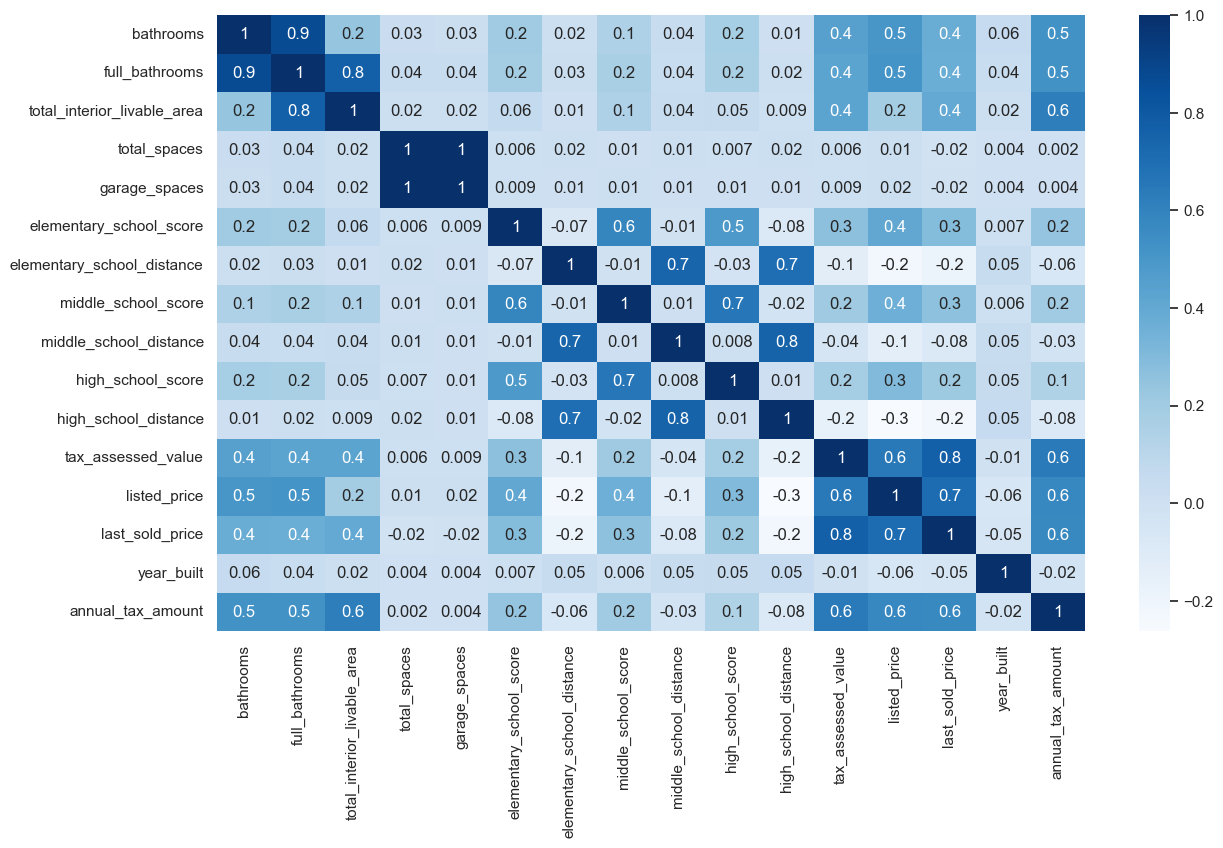

In [1486]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_train[numeric_cols].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

**Some num features have strong linear correlation. I removed them**

In [1487]:
corr_matrix = df_train[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_31541/2242895055.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


**Also I want to use zip instead of address**

In [1488]:
numeric_cols = [col for col in numeric_cols if col not in to_drop]
numeric_cols.append('zip')

## Deal with NaNs

In [1489]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(32)

,Total,Percent
last_sold_price,13080,0.373714
last_sold_on,13078,0.373657
middle_school_score,12238,0.349657
middle_school,12237,0.349629
middle_school_distance,12237,0.349629
laundry_features,10443,0.298371
appliances_included,9855,0.281571
cooling_features,8635,0.246714
flooring,8517,0.243343
cooling,7778,0.222229


### fillna some of them

**In this section I have filled nan based on my life experiences**

For example, if school didn't specified, it may mean that the nearest school very far away from house. Thus I put very large distance from it and a zero score 

In [1490]:
def fillna_db(db):
    db['last_sold_price'] = db.loc[:, 'last_sold_price'].fillna(0)
    db['last_sold_on'] = db.loc[:, 'last_sold_on'].fillna(0)

    db['high_school_score'] = db.loc[:, 'high_school_score'].fillna(0)
    db['high_school_distance'] = db.loc[:, 'high_school_distance'].fillna(99999)
    db['high_school'] = db.loc[:, 'high_school'].fillna('None')

    db['middle_school_score'] = db.loc[:, 'middle_school_score'].fillna(0)
    db['middle_school_distance'] = db.loc[:, 'middle_school_distance'].fillna(99999)
    db['middle_school'] = db.loc[:, 'middle_school'].fillna('None')

    db['elementary_school_score'] = db.loc[:, 'elementary_school_score'].fillna(0)
    db['elementary_school_distance'] = db.loc[:, 'elementary_school_distance'].fillna(99999)
    db['elementary_school'] = db.loc[:, 'elementary_school'].fillna('None')

    db['laundry_features'] = db.loc[:, 'laundry_features'].fillna('None')
    db['appliances_included'] = db.loc[:, 'appliances_included'].fillna('None')
    db['cooling_features'] = db.loc[:, 'cooling_features'].fillna('None')
    db['heating_features'] = db.loc[:, 'heating_features'].fillna('None')
    db['parking_features'] = db.loc[:, 'parking_features'].fillna('None')

    db['flooring'] = db.loc[:, 'flooring'].fillna('Wood')
    db['cooling'] = db.loc[:, 'cooling'].fillna('None')
    db['heating'] = db.loc[:, 'heating'].fillna('None')

    db['annual_tax_amount'] = db.loc[:, 'annual_tax_amount'].fillna(db['annual_tax_amount'].median(axis=0))
    db['tax_assessed_value'] = db.loc[:, 'tax_assessed_value'].fillna(db['tax_assessed_value'].median(axis=0))

    db['bathrooms'] = db.loc[:, 'bathrooms'].fillna(1)
    db['total_interior_livable_area'] = db['total_interior_livable_area'].fillna(1568.0)


    db['summary'] = db['summary'].fillna('No comments')
    db['summary'] = db['summary'].fillna('No comments')

    return db


### deleting some rows

**I deleted some lines with nans where the percentage of nans is not so great**

In [1491]:
def del_rows_db(db):
    db = db.dropna(subset=['region'])
    db = db.dropna(subset=['bedrooms'])
    db = db.dropna(subset=['year_built'])
    db = db.dropna(subset=['total_spaces'])
    db = db.dropna(subset=['parking'])
    db = db.dropna(subset=['listed_price'])

    return db

## Chosing features

In [1492]:
df_train = df_train.drop(34374) # strange row

df_train_new = fillna_db(df_train)
df_train_new = del_rows_db(df_train_new)

df_test_new = fillna_db(df_test)
df_test_new = del_rows_db(df_test_new)

df = df_train_new.append(df_test_new, ignore_index=True)

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_31541/3516051088.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train_new.append(df_test_new, ignore_index=True)


## Label Encoding

**For the remaining cat features**

In [1495]:
def lc_encode(db):
    encoder = LabelEncoder()
    for series in list(db.columns):
        if db[series].dtype == 'object':
            db[series] = encoder.fit_transform(db[series].apply(lambda x: str(x)))
        else:
            print(series)
    return db

## Count Vectorizer

**For cv_cols**

In [1496]:
from sklearn.feature_extraction.text import CountVectorizer

In [1602]:
def cv_encode(db_train, db_test, cv_cols):
    i = 0
    for seria, cnt in cv_cols.items():
        count_vectorizer = CountVectorizer(stop_words='english', max_features=cnt)
        count_vectorizer.fit(df[seria].values)
        if i == 0:
            X_train_cv = count_vectorizer.transform(db_train[seria]).toarray()
            X_test_cv = count_vectorizer.transform(db_test[seria]).toarray()
            i += 1
        X_train_cv = np.concatenate([X_train_cv, count_vectorizer.transform(db_train[seria]).toarray()], axis=1)
        X_test_cv = np.concatenate([X_test_cv, count_vectorizer.transform(db_test[seria]).toarray()], axis=1)
    
    return X_train_cv, X_test_cv

**Final data conversion**

In [1603]:
X_train_cat, X_test_cat = lc_encode(df_train_new[cat_cols]).values, lc_encode(df_test_new[cat_cols]).values
X_train_cv, X_test_cv = cv_encode(df_train_new, df_test_new, cv_cols)

X_train_text, X_test_text = df_train_new[text_cols].values, df_test_new[text_cols].values

X_train_num, Y_train = df_train_new[numeric_cols].values, df_train_new[target_cols].values
X_test_num, Y_test = df_test_new[numeric_cols].values, df_test_new[target_cols].values

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_31541/3135418665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[series] = encoder.fit_transform(db[series].apply(lambda x: str(x)))
/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_31541/3135418665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[series] = encoder.fit_transform(db[series].apply(lambda x: str(x)))


In [1499]:
# scaling
scaler = StandardScaler()
X_train_num_sc = scaler.fit_transform(X_train_num)
X_test_num_sc = scaler.fit_transform(X_test_num)

## Training Word2Vec model for summaries

In [1500]:
df_summary_tok = df['summary'].apply(lambda x: word_tokenize(x.lower()))

model_summary = Word2Vec(df_summary_tok.to_list(), 
                 vector_size=150,
                 min_count=3,
                 window=5).wv

## TF-IDF for summaries

In [1501]:
df_train_new_summary = df_train_new['summary']
df_test_new_summary = df_test_new['summary']

tf_summary = TfidfVectorizer(analyzer='word', stop_words = 'english', max_features=150)

tfidf_matrix_summary = tf_summary.fit(df['summary'].tolist())

tfidf_train_summary = tf_summary.transform(df_train_new_summary.tolist())
tfidf_test_summary = tf_summary.transform(df_test_new_summary.tolist())

## Getting word2vec vector for comments

In [1502]:
def get_review_embedding_new(*args):
    review = args[0]
    model = args[1]

    review_tok = word_tokenize(review.lower())
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_vectors = [model[x] if model.has_index_for(x) else vector for x in review_tok]
    n = len(phrase_vectors)

    if len(args) == 2:
        vector = np.mean(phrase_vectors, axis=0)

    elif len(args) == 3:
        tfidf_values = args[2]
        if n != 0:
            for vec in phrase_vectors:
                w_vec = np.squeeze(np.array([vec_el*w for vec_el, w in zip(vec, tfidf_values.toarray())]))
                vector += w_vec
            vector /= n
        else:
            print(n, phrase_vectors, review)
    return vector

In [1503]:
X_train_summary = np.asarray([get_review_embedding_new(x, model_summary, vec_tfidf[0]) for vec_tfidf, x in zip(tfidf_train_summary, df_train_new_summary)])
X_test_summary = np.asarray([get_review_embedding_new(x, model_summary, vec_tfidf[0]) for vec_tfidf, x in zip(tfidf_test_summary, df_test_new_summary)])

### checking NaN values

In [1504]:
np.where(np.isnan(X_train_summary)), np.where(np.isnan(X_test_summary)),

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [1505]:
import umap
summary_vectors_2d_train = umap.UMAP(n_neighbors=3).fit_transform(X_train_summary)

In [1582]:
import bokeh
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):

    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    
    return fig

Loading BokehJS ...

In [1610]:
draw_vectors(summary_vectors_2d_train[::100, 0], summary_vectors_2d_train[::100, 1],
             phrase=[phrase[:200] for phrase in df_train['summary'][::100]],
             radius=20,)

figure(id='p7485', ...)

## Concating data

In [1549]:
X_train = np.concatenate([X_train_num_sc, X_train_cat, X_train_cv, X_train_summary], axis=1)
Y_train = Y_train.ravel()

X_test = np.concatenate([X_test_num_sc, X_test_cat, X_test_cv, X_test_summary], axis=1)
Y_test = Y_test.ravel()
X_train.shape, X_test.shape

((32109, 219), (2702, 219))

## Random Forest Regressor

In [1601]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [1550]:
# Params for random forest (Huge grid)
n_estimators = [int(x) for x in np.linspace(100, 400, 13)]
max_depth = [int(x) for x in np.linspace(10, 100, 19)]
min_samples_split = [int(x) for x in np.linspace(2, 50, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 50, 10)]
params_rf = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [1551]:
model = RandomForestRegressor()
grid_search = RandomizedSearchCV(model, params_rf, n_iter=30, cv=5, n_jobs=-1, return_train_score=True, scoring="neg_root_mean_squared_error")

grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [1552]:
print(f'Params for RFR after Random Search:\n{best_params}')

Params for RFR after Random Search:
{'n_estimators': 125, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_depth': 70}


In [1553]:
best_estimator.fit(X_train, Y_train)
test_preds = best_estimator.predict(X_test)

In [1555]:
print(f'Mean Squared Error of Random Forest Regressor after Random Search: {np.sqrt(mean_squared_error(Y_test, test_preds))}')

Mean Squared Error of Random Forest Regressor after Random Search: 0.21738228309290708


## Part 2. Clustering [8 points]

In this part we will try to analyze a dump of leaked passwords of internet users. It can be accessed here: https://github.com/ignis-sec/Pwdb-Public/tree/master/wordlists

First kind reminder - if you see your password in this base, change it immediately.

In [1557]:
words = []
with open("ignis-1M.txt", "r") as file:
    for line in file:
        words.append(line.strip())

To make it more simple, we'll use only first 3K of passwords:

In [1558]:
words = np.array(words[:3000]).reshape((-1, 1))

**Task 2.1 [0.5 point]**

Let's start with calculating levenshtein distance between words in the dataset. Compute a `3000x3000` distance matrix.

In [1559]:
import numpy as np
from pylev import levenshtein
import matplotlib.pyplot as plt

In [1561]:
X = np.zeros((words.shape[0], words.shape[0]))

for i, word_1 in enumerate(words):
    for j, word_2 in enumerate(words):
        X[i][j] = levenshtein(word_1[0], word_2[0])

X

array([[ 0.,  3.,  8., ...,  3.,  9., 12.],
       [ 3.,  0.,  9., ...,  6.,  9., 12.],
       [ 8.,  9.,  0., ...,  9.,  7., 11.],
       ...,
       [ 3.,  6.,  9., ...,  0.,  8., 12.],
       [ 9.,  9.,  7., ...,  8.,  0., 11.],
       [12., 12., 11., ..., 12., 11.,  0.]])

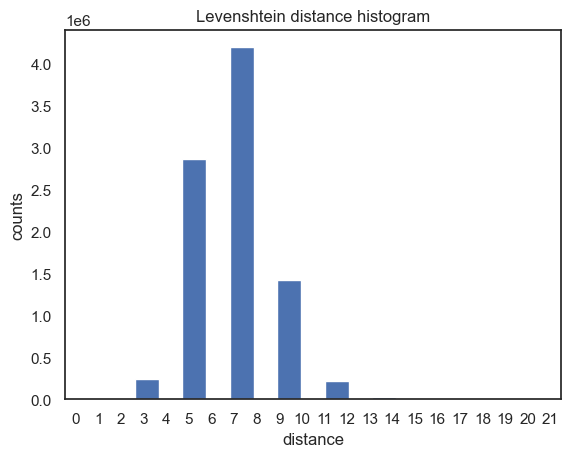

In [1562]:
plt.hist(X.reshape(-1), rwidth=0.5)
plt.xticks(np.arange(0, X.max() + 1))
plt.xlabel('distance')
plt.ylabel('counts')
plt.title('Levenshtein distance histogram')
plt.show()

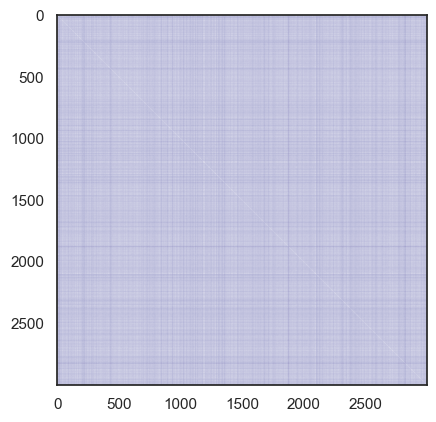

In [1563]:
plt.imshow(X, cmap="Purples")
plt.show()

**Task 2.2 [1.5 point]** First algorithm we'll use is `DBSCAN`.

We have to adjust two parameters:
- `eps`
- `min_samples`

Grid-search these two parameters and report number and sizes of output clusters for every pair of parameters. 

**Note**: to define an appropriate space for each parameter remember what they mean and how they affect DBSCAN

In [1564]:
from sklearn.cluster import DBSCAN

Example:

In [1565]:
eps = 3.0
min_samples = 3

db = DBSCAN(metric="precomputed", min_samples=min_samples, eps=eps).fit(X)
labels = db.labels_
len(set(labels))

7

In [1566]:
from collections import Counter
def dbscan_grid_search(data, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 0, max_clust = 10):
    set_of_parameters = []
    cluster_count = []

    for eps_val in eps_space:
        for samples_val in min_samples_space:
            dbscan_grid = DBSCAN(metric="precomputed", eps=eps_val, min_samples=samples_val).fit(data)
            clusters = dbscan_grid.labels_
            n_clusters = len(np.unique(clusters))

            if n_clusters >= min_clust and n_clusters <= max_clust:
                return [eps_val, samples_val, n_clusters], clusters

**Task 2.3 [1 point]** Choose a set of parameters that leads to 20-25 clusters.

- Is there a cluster that is significantly larger than the others? 
- How would you describe these clusters, what kind of passwords they contain? 

Use small samples from each cluster and try to describe a relevant password pattern.

**Chosing set of parameters**

In [1567]:
set_of_parameters, cluster_count = dbscan_grid_search(X, np.arange(1, 10), np.arange(1, 10), 20, 25)
set_of_parameters

[1, 5, 22]

**Yes, the -1 (outliers) significantly larger than others**

In [1568]:
dict(Counter(cluster_count))

{0: 76,
 1: 16,
 2: 12,
 -1: 2738,
 3: 15,
 4: 4,
 5: 5,
 6: 5,
 7: 7,
 8: 8,
 9: 6,
 10: 9,
 11: 6,
 12: 5,
 19: 5,
 13: 5,
 14: 5,
 15: 5,
 16: 14,
 17: 19,
 18: 8,
 20: 27}

In [1604]:
cluster_count[0], cluster_count[1], cluster_count[20], cluster_count[26]

(0, 0, -1, -1)

In [1569]:
X[0], words[0], X[1], words[1], X[20], words[20], X[26], words[26],

(array([ 0.,  3.,  8., ...,  3.,  9., 12.]),
 array(['123456'], dtype='<U21'),
 array([ 3.,  0.,  9., ...,  6.,  9., 12.]),
 array(['123456789'], dtype='<U21'),
 array([11., 11.,  9., ..., 11., 10., 12.]),
 array(['yuantuo2012'], dtype='<U21'),
 array([ 5.,  8.,  8., ...,  8.,  9., 12.]),
 array(['666666'], dtype='<U21'))

**The data was decomposed into a close password by the Levenshtein distance. But the parameters of the models were chosen in such a way that the set of passwords is not in any cluster**

**Task 2.4 [1 point]** 

Let's try to improve clustering by introducing a custome levenshtein distance. You might have noticed that there are some specific password generation patterns, like `qwerty -> qwerty123`.

Classic levenshtein distance for these two passwords is 3. Try to define a custom levenshtein distance that would make these passwords closer.

Feel free to experiment and create as complex levenshtein distance as you would like.

Report new clustering, describe new clusters.


In [ ]:
#!pip3 install -U strsimpy

Example:

In [1570]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    if (char_a, char_b) == ('t', 'r') or (char_a, char_b) == ('r', 't'):
        return 0.5
    return 1.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [1571]:
print(levenshtein('Stting1', 'String1'))
print(weighted_levenshtein.distance('Stting1', 'String1'))

1
0.5


My example:

In [1572]:
def my_insertion_cost(char):
    try: 
        int(char)
        return 1.0/10

    except:
        return 1.0


def my_deletion_cost(char):
    try: 
        int(char)
        return 1.0/10

    except:
        return 1.0


def my_substitution_cost(char_a, char_b):
    # subs_list = [('r', 't'), ('t', 'r')]
    # if (char_a, char_b) in subs_list:
    #     return 0.2
    return np.abs(ord(char_a) - ord(char_b))

my_weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=my_substitution_cost,
    insertion_cost_fn=my_insertion_cost,
    deletion_cost_fn=my_deletion_cost)

In [1573]:
ord('k'), ord('n')

(107, 110)

In [1574]:
print(levenshtein('Stting1', 'String1'))
print(my_weighted_levenshtein.distance('Sttikg', 'String1'))

1
4.1


In [1575]:
print(levenshtein('qwerty', 'qwerty123'))
print(my_weighted_levenshtein.distance('qwerty', 'qwerty123'))

3
0.30000000000000004


**Task 2.5 [1 point]** Hierarchical Agglomerative clustering

It is time to draw some pictures. 
- apply agglomerative clustering algorithm to form 5-10 clusters
- plot a dendrogram
- describe output clusters

In [1576]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

from collections import Counter

Compute dendrogram:

In [1577]:
condensed_X = pdist(X)
linkage = hierarchy.linkage(condensed_X,  method='average')

Plot it:

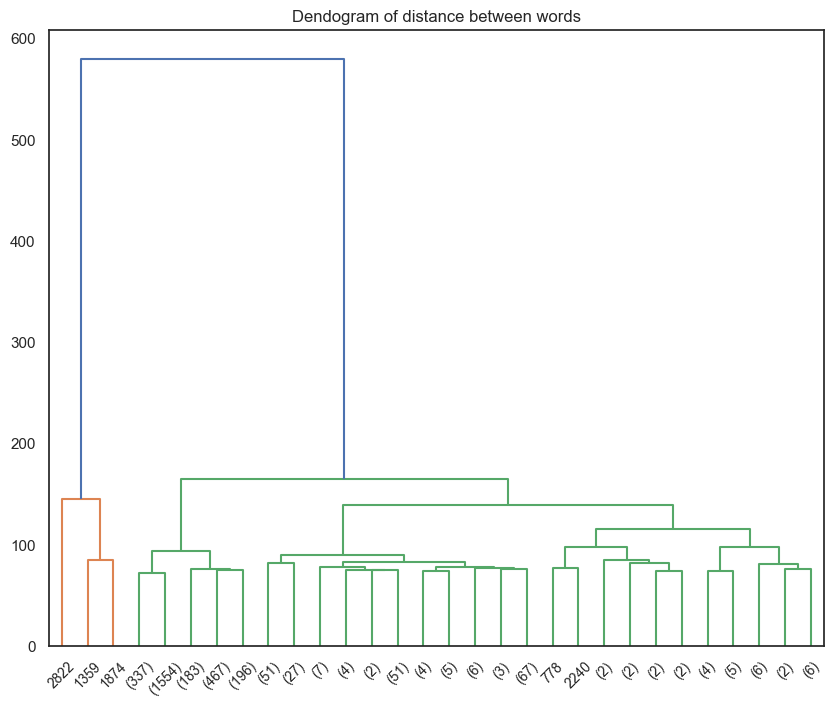

In [1578]:
fig, ax = plt.subplots(figsize=(10, 8))

hierarchy.dendrogram(linkage, truncate_mode='lastp', ax=ax)
plt.title('Dendogram of distance between words')
plt.show()

Compute clusters:

In [1579]:
cluster = AgglomerativeClustering(n_clusters=10).fit(X)
labels = cluster.labels_
labels

/Users/litvan007/intro_ml_2022/.venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([4, 5, 3, ..., 5, 8, 2])

Describe them in any form:

In [1580]:
import umap

words_2d = umap.UMAP(n_neighbors=10).fit_transform(X)

In [1584]:
colors = list(map(lambda x: bokeh.colors.named.__all__[x+30], labels))

In [1585]:
draw_vectors(words_2d[:, 0], words_2d[:, 1],
             phrase=[word for word in words],
             radius=15, color=colors)

figure(id='p2121', ...)

### K-Means
This clustering algorithm doesn't work with precomputed distances, as it has to calculate centroids and measure distance from a centroid to every object.

Thus, we need to map the dataset to some vector space. How? Embeddings of course

In [1586]:
import gensim.downloader

In [1587]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [1594]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.6 [1 point]** 

- Create two lists - for those passwords that can be embedded and for their embeddings correspondigly
- How many passwords have embeddings? 
- Describe the passwords that have embeddings and those that don't. Give your reasoning why these groups are formed like this.


In [1596]:
from tqdm import tqdm
all_embeds = list(word_embeddings.key_to_index.keys())
words_w_embeddings = [word[0] for word in tqdm(words) if word[0] in all_embeds]
embeddings = [word_embeddings[x[0]] for x in words_w_embeddings]

assert len(words_w_embeddings) == len(embeddings)

100%|██████████| 3000/3000 [00:09<00:00, 302.84it/s]


In [1597]:
len(words_w_embeddings)

1794

**Task 2.7 [2 point]** K-MEANS

- Run kmeans with different parameters, for every set of parameters report average in-class, out-class distance
- Remember that k-means has stochasticity, thus two algorithms with same hyperparameters can give different results
- Chose several (3-5) your favorite k-means versions, visualize clusters in 2D using PCA or TSNE
- Describe what are the clusters that kmeans can detect
- Are they different from DBSCAN? Why?

In [1606]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Example:

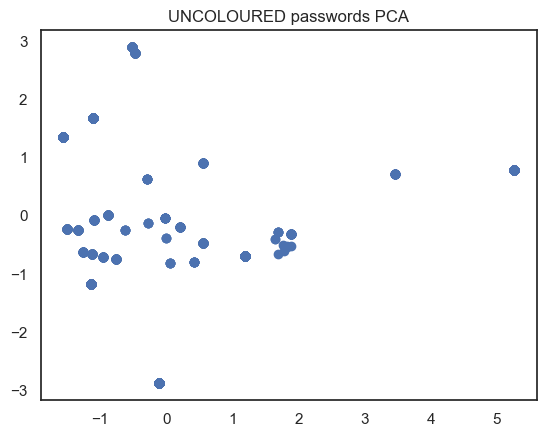

In [1607]:
embeddings_clusters = KMeans(n_clusters=3).fit_predict(embeddings)
    

pca = PCA(n_components=2)
pca_words = pca.fit_transform(embeddings)

plt.scatter(pca_words[:, 0], pca_words[:, 1])
plt.title("UNCOLOURED passwords PCA") # YOU HAVE TO PLOT IT WITH COLORS
plt.show()

My examples:

In [1608]:
def average_distance(X, labels, type='in'):
    data = np.concatenate([X, np.expand_dims(labels, axis=1)], axis=1)
    averages_list = []
    if type == 'in':
        for mark in labels:
            data_temp = data[np.where(data[:, -1] == mark)]
            averages_list.append(pdist(data_temp).mean())
        return sum(averages_list)/len(averages_list)

    elif type == 'out':
        for mark in labels:
            data_temp = data[np.where(data[:, -1] != mark)]
            averages_list.append(pdist(data_temp).mean())
        return sum(averages_list)/len(averages_list)

In [1609]:
from sklearn.model_selection import ParameterGrid

param_grid = {'n_clusters': [4, 6, 8, 10, 12],
              'init': ['k-means++'],
              'max_iter': [100, 200, 300]}

grid = ParameterGrid(param_grid)

for i, params in enumerate(grid):
    model_kms = KMeans(**params)
    embeddings_clusters = model_kms.fit_predict(embeddings)
    
    print(f"Kmeans model: {i+1}\nparams: {params}")
    
    colors = list(map(lambda x: bokeh.colors.named.__all__[x+30], embeddings_clusters))
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=100).fit_transform(np.array(embeddings))
    draw_vectors(X_embedded[:, 0], X_embedded[:, 1],
             phrase=[word for word in words_w_embeddings],
             radius=15, color=colors)
    
    print(f"Average in-class distance:{average_distance(np.array(embeddings), embeddings_clusters)}, out-class distance {average_distance(np.array(embeddings), embeddings_clusters, type='out')}")
    print(f"{'_'*83}")

Kmeans model: 1
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4}


Average in-class distance:3.867063537827952, out-class distance 5.486163653978691
___________________________________________________________________________________
Kmeans model: 2
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6}


Average in-class distance:2.9090233425833216, out-class distance 5.798759122359786
___________________________________________________________________________________
Kmeans model: 3
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8}


Average in-class distance:2.421917822410118, out-class distance 5.983312487570102
___________________________________________________________________________________
Kmeans model: 4
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10}


Average in-class distance:2.030440581723807, out-class distance 6.349981269465909
___________________________________________________________________________________
Kmeans model: 5
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 12}


Average in-class distance:1.6048625162070285, out-class distance 6.634198658695904
___________________________________________________________________________________
Kmeans model: 6
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 4}


Average in-class distance:3.8951314602874096, out-class distance 5.594144180405447
___________________________________________________________________________________
Kmeans model: 7
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 6}


Average in-class distance:2.9090233425833216, out-class distance 5.680736987331384
___________________________________________________________________________________
Kmeans model: 8
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 8}


Average in-class distance:2.3789644877681093, out-class distance 5.891035602169307
___________________________________________________________________________________
Kmeans model: 9
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 10}


Average in-class distance:1.9525203278861791, out-class distance 6.412106916594865
___________________________________________________________________________________
Kmeans model: 10
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 12}


Average in-class distance:1.5876399368978606, out-class distance 6.7862568305357875
___________________________________________________________________________________
Kmeans model: 11
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4}


Average in-class distance:3.857760889330204, out-class distance 5.340463272067939
___________________________________________________________________________________
Kmeans model: 12
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6}


Average in-class distance:2.999065428186561, out-class distance 5.765009237047213
___________________________________________________________________________________
Kmeans model: 13
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8}


Average in-class distance:2.370186346042069, out-class distance 5.9519262779681785
___________________________________________________________________________________
Kmeans model: 14
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10}


Average in-class distance:1.9525203278861791, out-class distance 6.286065912192711
___________________________________________________________________________________
Kmeans model: 15
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 12}


Average in-class distance:1.5876399368978606, out-class distance 6.526633964069071
___________________________________________________________________________________


* Kmeans minimizes the total squared errors of distances between data points and cluster centers. Each cluster contains data that is very similar in metric, as far as the specified number of clusters allows. For example, in one of the clusters there may be words such as *`piglet`, `pipmin`, `puppies` and so on*. Obviously, kmens most passwords in each class will started with the same letter

* Yes, the clustering results of kmeans and dbscan will be different, because dbscan can put outliers in a separate cluster (-1). Despite the fact that if we find the optimal dbscan parameters and get the same number of clusters as in kmeans, the result may be different because the extreme points in each kmeans cluster are outliers in dbscan clusters

**Task 2.8 [extra points]**

Here are some ideas how to experiment:
- compare performance of algorithms with levenshtein distance and embeddings
- use algorithms that were mentioned in the lecture, but with no explanation. In this section write a brief description of an algorithm before applying it

In [ ]:
# YOUR CODE HERE